In [1]:
import PrepareDataWithSA_Word2Vec
import PrepareData
start_date="2021-03-12"
last_date="2022-05-02"
stock_name="Coupang"
CPNG_train_set, CPNG_test_set,CPNG_only_stock_train_set, CPNG_only_stock_test_set=PrepareDataWithSA_Word2Vec.getPreaparedData(stock_name,start_date,last_date)

start_date="2020-11-01"
last_date="2022-05-02"
stock_name="palantir"
PLTR_train_set, PLTR_test_set,PLTR_only_stock_train_set, PLTR_only_stock_test_set=PrepareDataWithSA_Word2Vec.getPreaparedData(stock_name,start_date,last_date)


start_date="2016-01-01"
last_date="2022-05-24"
stock_name="Tesla"
TSLA_train_set, TSLA_test_set,TSLA_only_stock_train_set, TSLA_only_stock_test_set=PrepareDataWithSA_Word2Vec.getPreaparedData(stock_name,start_date,last_date)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ghkdwodnd321\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghkdwodnd321\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ghkdwodnd321\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


FIle skipped (not tweet): stock_2016-01-01_2022-05-24_1D.csv
FIle skipped (not tweet): stock_2018-04-19_2020-01-13_1D.csv
FIle skipped (not tweet): stock_2020-11-01_2022-05-02_1D.csv
FIle skipped (not tweet): stock_2020-11-20_2020-11-24_1h.csv
FIle skipped (not tweet): stock_2020-12-01_2020-12-13_1h.csv
FIle skipped (not tweet): stock_2020-12-02_2020-12-13_1h.csv
FIle skipped (not tweet): stock_2021-03-12_2022-05-02_1D.csv
FIle skipped (not tweet): stock_2021-03-12_2022-05-24_1D.csv


In [2]:
TSLA_train_set.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'tw_count',
       'tw_mean', 'tw_vola', 'tw_min', 'tw_max', 'tw_pola', 'tw_subj',
       'tw_n_pos', 'tw_n_neg', 'tw_ratio_pos', 'tw_ratio_neg'],
      dtype='object')

In [2]:
CPNG_train_data, target_data, CPNG_test_train_data, CPNG_test_target_data=PrepareData.makeLSTMDataSet(CPNG_train_set, CPNG_test_set)
CPNG_only_stock_train_data, CPNG_only_stock_target_data, CPNG_only_stock_test_train_data, CPNG_only_stock_test_target_data=PrepareData.makeLSTMDataSet(CPNG_only_stock_train_set, CPNG_only_stock_test_set)

PLTR_train_data, tPLTR_arget_data, PLTR_test_train_data, PLTR_test_target_data=PrepareData.makeLSTMDataSet(PLTR_train_set, PLTR_test_set)
PLTR_only_stock_train_data, PLTR_only_stock_target_data, PLTR_only_stock_test_train_data, PLTR_only_stock_test_target_data=PrepareData.makeLSTMDataSet(PLTR_only_stock_train_set, PLTR_only_stock_test_set)

train_data, target_data, test_train_data, test_target_data=PrepareData.makeLSTMDataSet(TSLA_train_set, TSLA_test_set)
only_stock_train_data, only_stock_target_data, only_stock_test_train_data, only_stock_test_target_data=PrepareData.makeLSTMDataSet(TSLA_only_stock_train_set, TSLA_only_stock_test_set)

In [12]:
import MakeLSTMModel

best_model=MakeLSTMModel.getBestModel(train_data,target_data,"recommend_stock")
best_model.fit(train_data, target_data, epochs = 1000, validation_data = (test_train_data, test_target_data))
best_model.save("best_model.h5")

INFO:tensorflow:Reloading Oracle from existing project model_store\recommend_stock\oracle.json
INFO:tensorflow:Reloading Tuner from model_store\recommend_stock\tuner0.json
INFO:tensorflow:Oracle triggered exit

    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is 50 and the optimal learning rate for the optimizer
    is 0.01.
    
Epoch 1/1000
35/35 [==============================] - 5s 32ms/step - loss: 11.9017 - val_loss: 17.4013
Epoch 2/1000
35/35 [==============================] - 0s 7ms/step - loss: 11.8443 - val_loss: 17.3152
Epoch 3/1000
35/35 [==============================] - 0s 8ms/step - loss: 11.7555 - val_loss: 17.3124
Epoch 4/1000
35/35 [==============================] - 0s 7ms/step - loss: 11.6426 - val_loss: 17.2109
Epoch 5/1000
35/35 [==============================] - 0s 7ms/step - loss: 11.4307 - val_loss: 17.4563
Epoch 6/1000
35/35 [==============================] - 0s 7ms/step - loss: 11.1742 - val_loss: 

In [4]:
only_stock_best_model=MakeLSTMModel.getBestModel(only_stock_train_data,only_stock_target_data,"only_stock_recommend_stock")
only_stock_best_model.fit(only_stock_train_data, only_stock_target_data, epochs = 1000, validation_data = (only_stock_test_train_data, only_stock_test_target_data))
only_stock_best_model.save("only_stock_best_model.h5")

INFO:tensorflow:Reloading Oracle from existing project model_store\only_stock_recommend_stock\oracle.json
INFO:tensorflow:Reloading Tuner from model_store\only_stock_recommend_stock\tuner0.json
INFO:tensorflow:Oracle triggered exit

    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is 50 and the optimal learning rate for the optimizer
    is 0.01.
    
Epoch 1/1000
35/35 [==============================] - 2s 16ms/step - loss: 12.2993 - val_loss: 17.4171
Epoch 2/1000
35/35 [==============================] - 0s 4ms/step - loss: 11.8321 - val_loss: 17.3218
Epoch 3/1000
35/35 [==============================] - 0s 4ms/step - loss: 11.6729 - val_loss: 17.5098
Epoch 4/1000
35/35 [==============================] - 0s 4ms/step - loss: 11.7628 - val_loss: 17.4401
Epoch 5/1000
35/35 [==============================] - 0s 4ms/step - loss: 11.6571 - val_loss: 17.3344
Epoch 6/1000
35/35 [==============================] - 0s 4ms/step - loss

MSE Error is 20.96111706634995
53.13807531380753 %
259.4331798427184 $


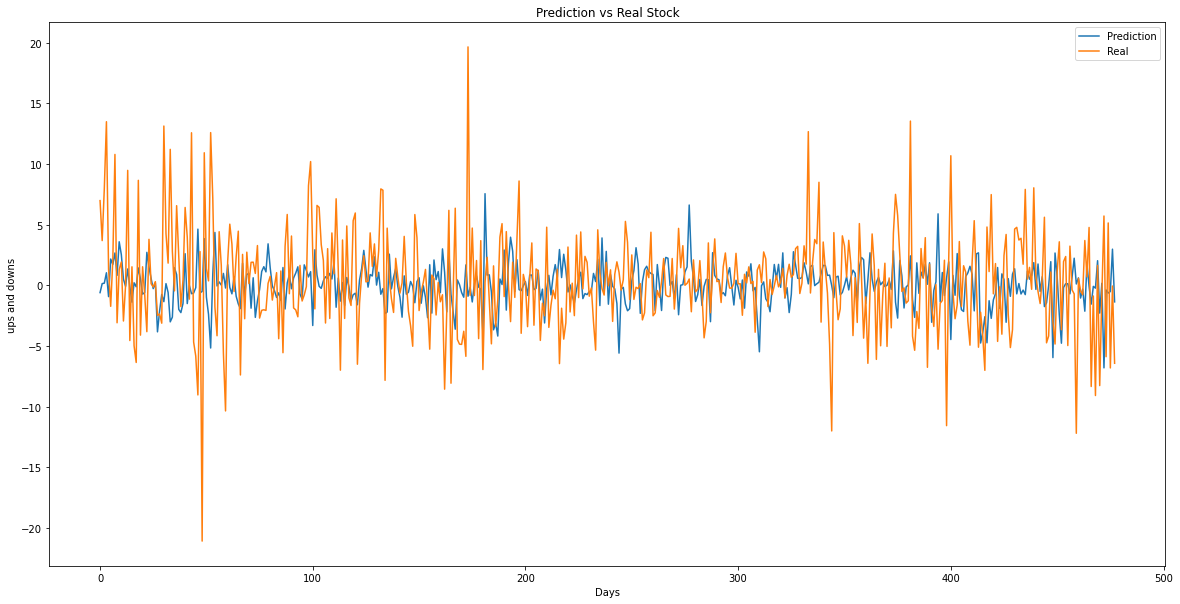

In [13]:
import EvalTool

EvalTool.printEval('best_model.h5',test_target_data, test_train_data)

MSE Error is 34.30612124003263
37.03703703703704 %
43.73222662294848 $


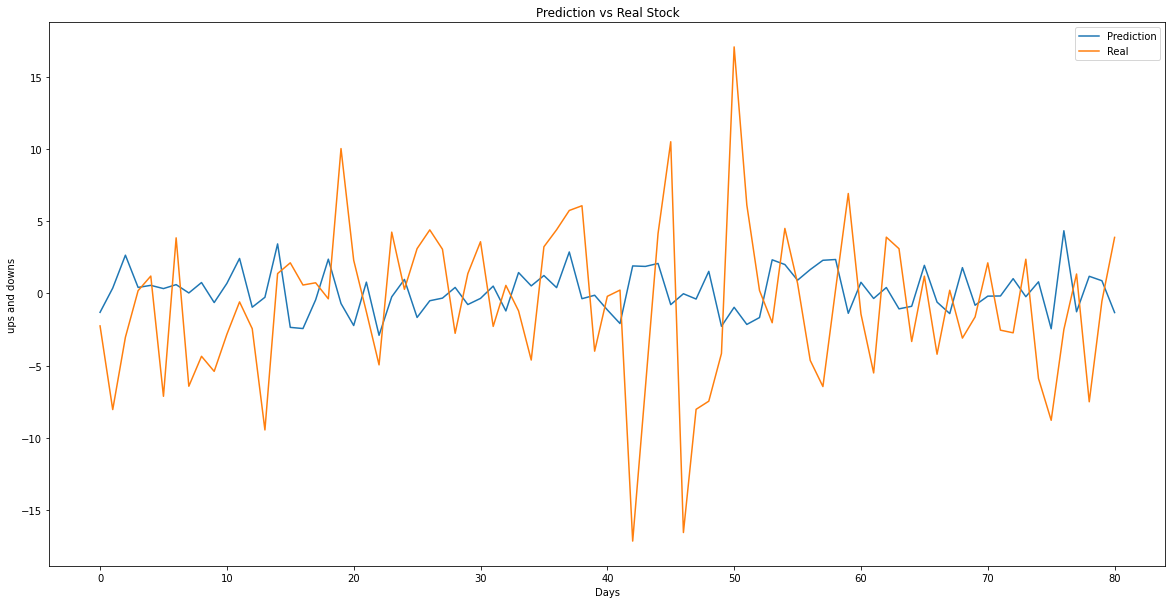

In [19]:
EvalTool.printEval('best_model.h5',CPNG_test_target_data, CPNG_test_train_data)

MSE Error is 19.42716970904759
50.467289719626166 %
91.92565142726595 $


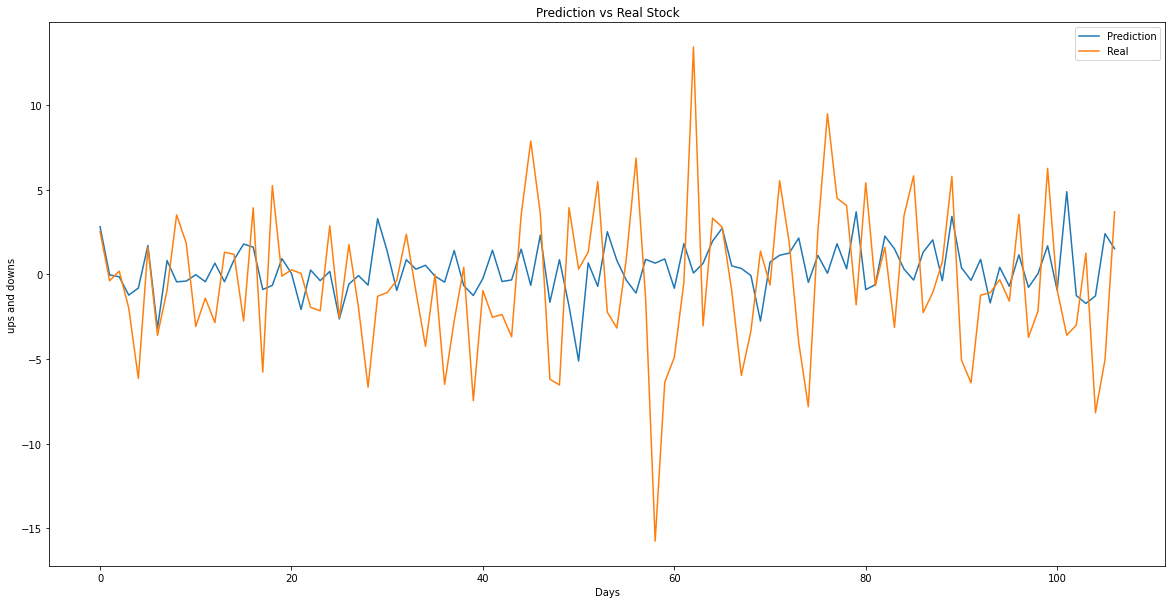

In [23]:
EvalTool.printEval('best_model.h5',PLTR_test_target_data, PLTR_test_train_data)

MSE Error is 20.890681943582265
53.76569037656904 %
311.55182859459194 $


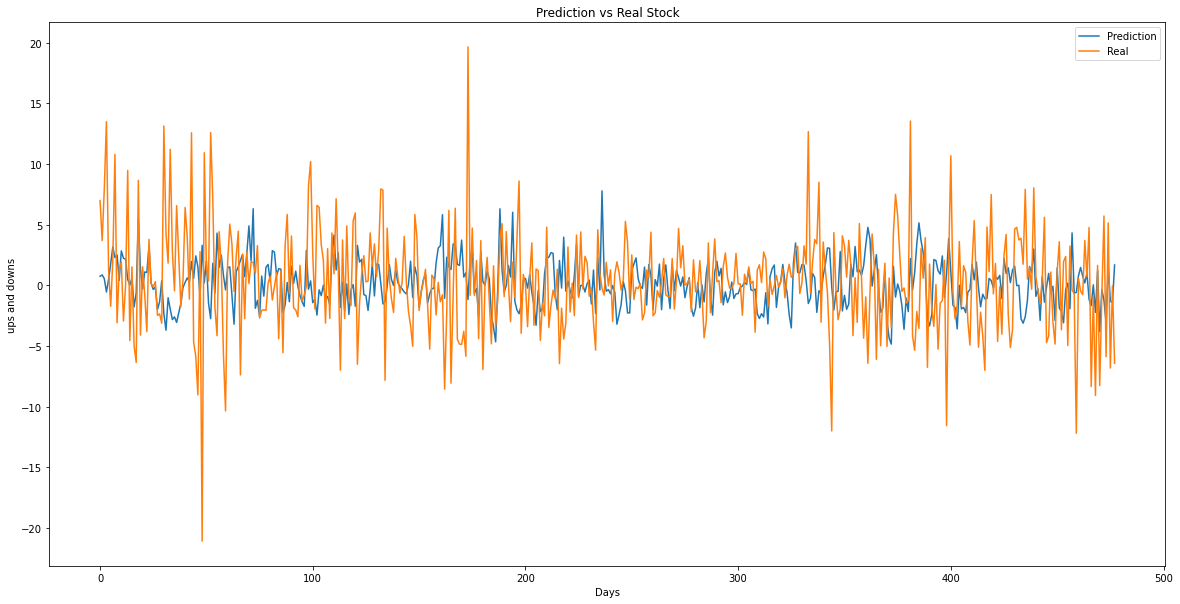

In [21]:

EvalTool.printEval('only_stock_best_model.h5',only_stock_test_target_data, only_stock_test_train_data)

MSE Error is 36.353222828704084
35.80246913580247 %
38.81896173790748 $


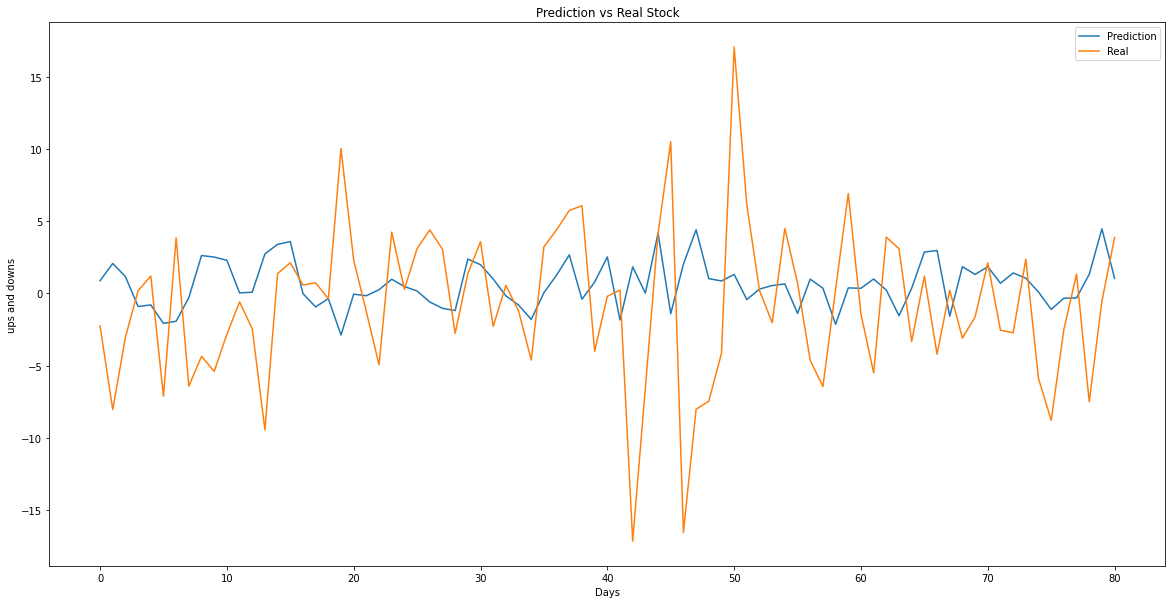

In [22]:

EvalTool.printEval('only_stock_best_model.h5',CPNG_only_stock_test_target_data, CPNG_only_stock_test_train_data)

MSE Error is 23.291230060839258
43.925233644859816 %
61.958117963644916 $


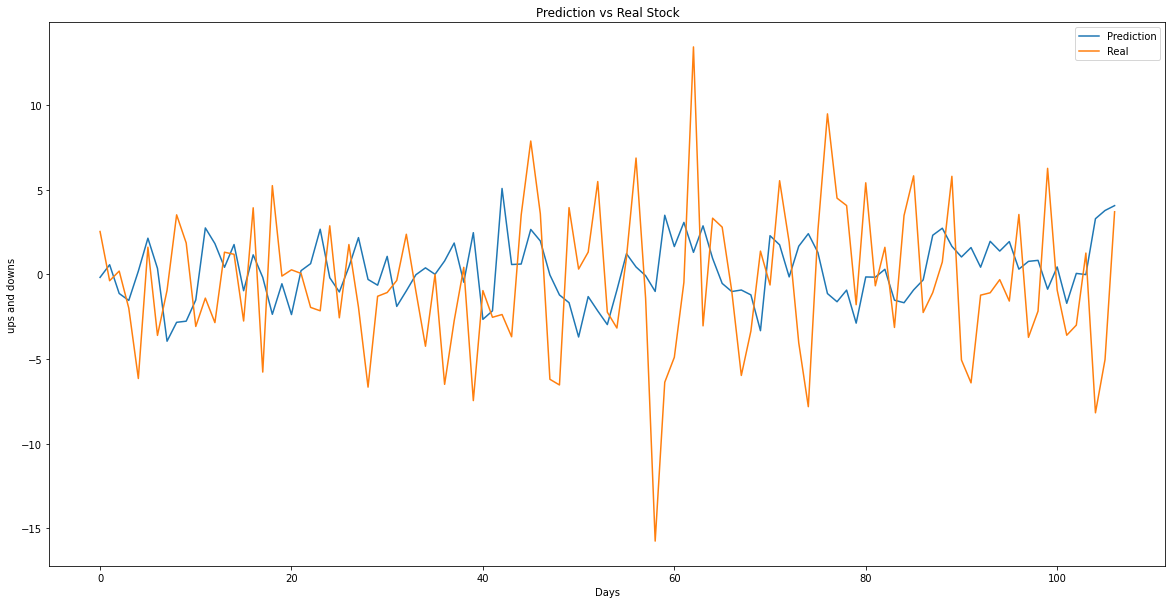

In [18]:

EvalTool.printEval('only_stock_best_model.h5',PLTR_only_stock_test_target_data, PLTR_only_stock_test_train_data)